# U.S. Medical Insurance Costs

#### Part 1. Setting up the project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
med_insurance = pd.read_csv('insurance.csv')

In [4]:
print(med_insurance.head(5))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


- Lets summarize our **data**

In [5]:
print(med_insurance.describe(include="all"))

                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    

In [6]:
print(med_insurance.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [7]:
med_insurance['region'] = med_insurance['region'].astype("string")

In [8]:
print(med_insurance.dtypes)

age                  int64
sex                 object
bmi                float64
children             int64
smoker              object
region      string[python]
charges            float64
dtype: object


In [9]:
partition_by_bmi = lambda bmi: 'Underweight' if bmi < 25.0 else 'Overweight'
bmi_copy = med_insurance['bmi']
med_insurance_bmi = bmi_copy.apply(partition_by_bmi)
med_insurance_bmi = med_insurance_bmi.to_frame()

med_insurance_bmi.rename(columns={'bmi': 'weight_category'}, inplace=True)
med_insurance_bmi['bmi'] = med_insurance.bmi

partition_by_bmi_2 = lambda row: 'Normal weight' if (row.bmi >= 18.5 and row.bmi < 25.0) else row.weight_category
med_insurance_bmi['weight_category'] = med_insurance_bmi.apply(partition_by_bmi_2, axis=1)

partition_by_bmi_3 = lambda row: 'Obesity' if row.bmi > 30.0 else row.weight_category
med_insurance_bmi['weight_category'] = med_insurance_bmi.apply(partition_by_bmi_3, axis=1)

print(med_insurance_bmi.head(30))


   weight_category     bmi
0       Overweight  27.900
1          Obesity  33.770
2          Obesity  33.000
3    Normal weight  22.705
4       Overweight  28.880
5       Overweight  25.740
6          Obesity  33.440
7       Overweight  27.740
8       Overweight  29.830
9       Overweight  25.840
10      Overweight  26.220
11      Overweight  26.290
12         Obesity  34.400
13         Obesity  39.820
14         Obesity  42.130
15   Normal weight  24.600
16         Obesity  30.780
17   Normal weight  23.845
18         Obesity  40.300
19         Obesity  35.300
20         Obesity  36.005
21         Obesity  32.400
22         Obesity  34.100
23         Obesity  31.920
24      Overweight  28.025
25      Overweight  27.720
26   Normal weight  23.085
27         Obesity  32.775
28     Underweight  17.385
29         Obesity  36.300


In [32]:
med_insurance_2 = med_insurance[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]
med_insurance_2['weight_category'] = med_insurance_bmi['weight_category']
print(med_insurance_2.head(5))

med_insurance_2 = pd.get_dummies(data=med_insurance_2, columns=['weight_category', 'region'], dtype='int')
print(med_insurance_2.head(5))

med_insurance_2.to_csv('med_insurance_processed.csv', index=False)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
   age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

  weight_category  
0      Overweight  
1         Obesity  
2         Obesity  
3   Normal weight  
4      Overweight  
   age     sex     bmi  children smoker      charges  \
0   19  female  27.900         0    yes  16884.92400   
1   18    male  33.770         1     no   1725.55230   
2   28    male  33.000         3     no   4449.46200   
3   33    male  22.705         0     no  21984.47061   
4   32    male  28.880         0     no   3

In [11]:
#### Part 2. Answering the questions

##### 0. Is there any relationship between bmi and insurance charges cost?

  weight_category     bmi      charges
0      Overweight  27.900  16884.92400
1         Obesity  33.770   1725.55230
2         Obesity  33.000   4449.46200
3   Normal weight  22.705  21984.47061
4      Overweight  28.880   3866.85520


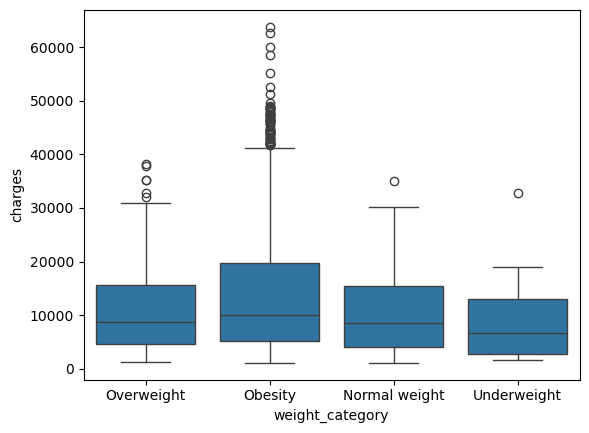

In [12]:
med_insurance_bmi['charges'] = med_insurance.charges
print(med_insurance_bmi.head(5))

sns.boxplot(data = med_insurance_bmi, x = 'weight_category', y = 'charges')
plt.show()

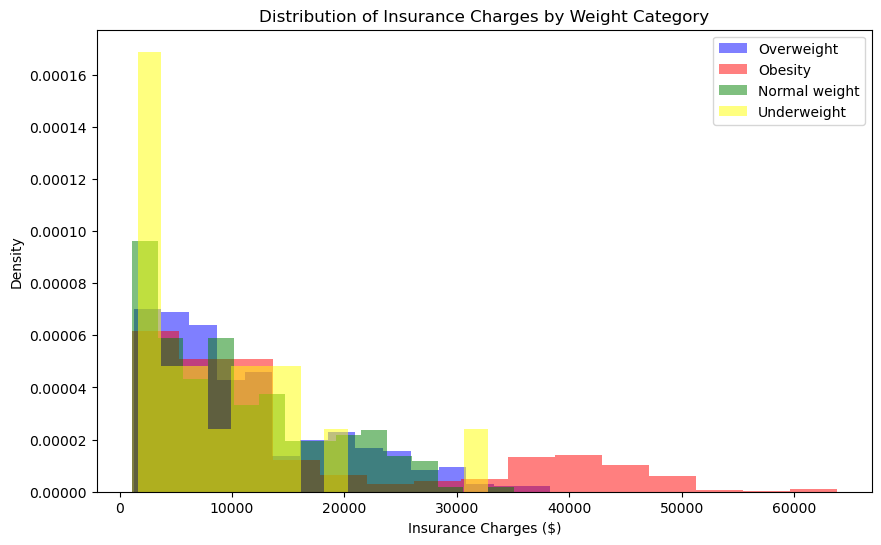

In [13]:
bmi_overweight = med_insurance_bmi[med_insurance_bmi['weight_category'] == 'Overweight']
bmi_obesity = med_insurance_bmi[med_insurance_bmi['weight_category'] == 'Obesity']
bmi_normal_weight = med_insurance_bmi[med_insurance_bmi['weight_category'] == 'Normal weight']
bmi_underweight = med_insurance_bmi[med_insurance_bmi['weight_category'] == 'Underweight']

plt.figure(figsize=(10, 6))

plt.hist(bmi_overweight.charges, color="blue", label="Overweight", density=True, alpha=0.5, bins=15)
plt.hist(bmi_obesity.charges, color="red", label="Obesity", density=True, alpha=0.5, bins=15)
plt.hist(bmi_normal_weight.charges, color="green", label="Normal weight", density=True, alpha=0.5, bins=15)
plt.hist(bmi_underweight.charges, color="yellow", label="Underweight", density=True, alpha=0.5, bins=15)

plt.xlabel('Insurance Charges ($)')
plt.ylabel('Density')
plt.title('Distribution of Insurance Charges by Weight Category')
plt.legend()
plt.show()

> **Observation 1.** From here we can see that people with BMI classified as Obesity tend to have higher insurance costs and people with Underweight tend to have less insurance costs, Normal weight and Overweight are overall the same.


---
##### 1. What is the central tendency of charges?

In [14]:
charges_mean = med_insurance.charges.mean()
print("Mean:", charges_mean)

charges_median = med_insurance.charges.median()
print("Median:", charges_median)

charges_mode = med_insurance.charges.mode()
print("Mode:", charges_mode)

from scipy.stats import trim_mean
charges_trim_mean = trim_mean(med_insurance.charges, proportiontocut=0.2)
print("Trimmed mean:", charges_trim_mean)

Mean: 13270.422265141257
Median: 9382.033
Mode: 0    1639.5631
Name: charges, dtype: float64
Trimmed mean: 9877.310386652985


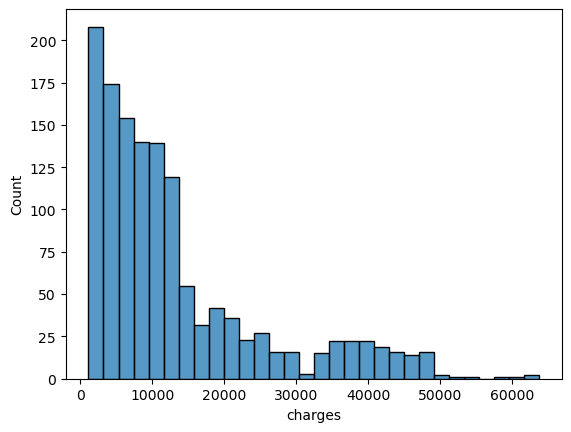

In [15]:
sns.histplot(x='charges', data=med_insurance)
plt.show()
plt.close()

> **Observation 1.** From here we can see that the data is highly right-skewed, which pulls mean to be higher than median. Meaning there are some extra high values on the right.

> **Observation 2.** We see that the trimmed mean is somewhat close to median and mode. Particularly when we cut off 20% from each side.

> **Observation 3.** From here we can see that the typical cost of insurance is around 9400$.


---
##### 2. What is the spread of charges?

In [16]:
charges_range = med_insurance.charges.max() - med_insurance.charges.min()
print("Range:", charges_range)

charges_iqr = med_insurance.charges.quantile(0.75) - med_insurance.charges.quantile(0.25)
print("Interquartile range:", charges_iqr)

charges_variance = med_insurance.charges.var()
print("Variance:", charges_variance)

charges_std = med_insurance.charges.std()
print("Standard deviation:", charges_std)

def mad(series):
    return (series - series.mean()).abs().mean()

charges_mad = mad(med_insurance.charges)
print("Mean Absolute Deviation:", charges_mad)

Range: 62648.554110000005
Interquartile range: 11899.625365
Variance: 146652372.15285483
Standard deviation: 12110.011236693996
Mean Absolute Deviation: 9091.12658113703


> **Observation 1.** We see that the range is not suitable here, this is due to 1 or more people have >60000$ charge price. Therefore we might need to look at IQR. 

> **Observation 2.** Standard deviation is not very descriptive here, because our data is highly right-skewed distributed. Therefore we might need to look at Mean Absolute Deviation. 

> **Observation 3.**
> - Observation 1 shows us that the 50% of central dataset is clustered around the median.
> - Obvervation 2 tells us that most people's insurance costs are clustered very tightly around the typical cost.


---
##### 3. Find the central tendency of ages in the dataset

In [17]:
ages_mean = med_insurance.age.mean()
print("Mean:", ages_mean)

ages_median = med_insurance.age.median()
print("Median:", ages_median)

ages_mode = med_insurance.age.mode()
print("Mode:", ages_mode)

from scipy.stats import trim_mean
ages_trim_mean = trim_mean(med_insurance.age, proportiontocut=0.2)
print("Trimmed mean:", ages_trim_mean)

Mean: 39.20702541106129
Median: 39.0
Mode: 0    18
Name: age, dtype: int64
Trimmed mean: 39.02985074626866


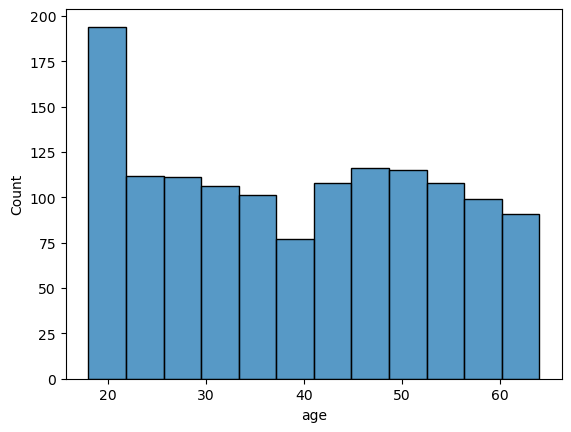

In [18]:
sns.histplot(x='age', data=med_insurance)
plt.show()
plt.close()

> **Observation 1.** From this histogram we can observe that we have a highly skewed distribution with a large number of younger people, as the low mode age of 0–18 is pulled down by outliers, while the median and mean are pulled up by a much smaller number of older individuals. The ages of the most frequent group are concentrated in the youngest category, but the majority of people are around the average age of 39. 

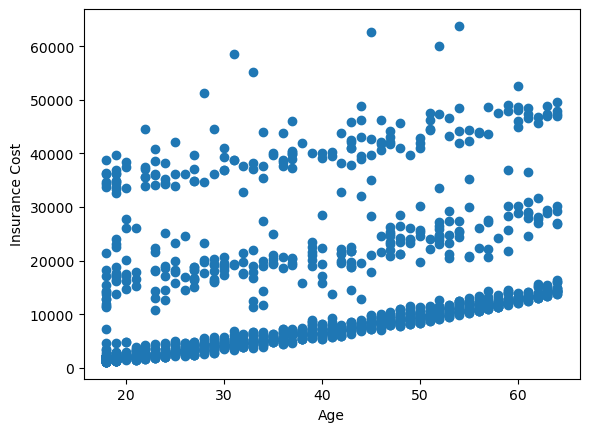

In [31]:
plt.scatter(x = med_insurance.age, y = med_insurance.charges)
plt.xlabel('Age')
plt.ylabel('Insurance Cost')
plt.show()

> **Observation 1.** From this scatter plot we can see that variables are not strongly associated.


---
##### 4. Find the proportion of smokers and non-smokers

In [20]:
med_insurance.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

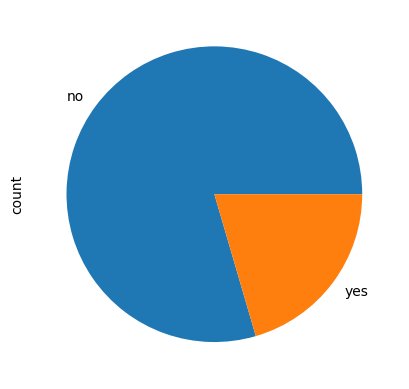

In [21]:
med_insurance.smoker.value_counts().plot.pie()
plt.show()
plt.close()

> **Observation 1.** From this we can see that most of the people in our dataset are not smoking. 


---
##### 5. What is the proportion of the number of children people have in our dataset?

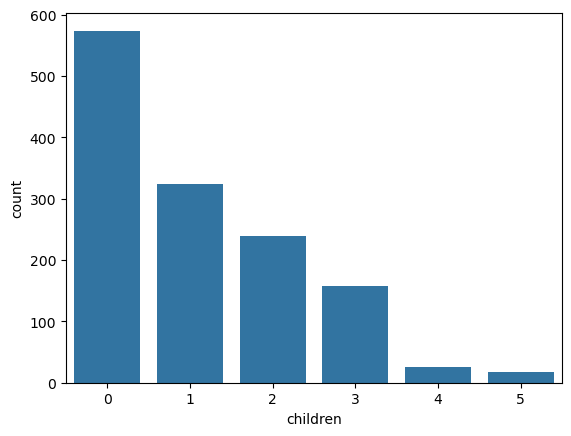

In [22]:
sns.countplot(x='children', data=med_insurance)
plt.show()
plt.close()

> **Observation 1.** This plot shows us that most of the people in our dataset have 0 or 1 child.


---
##### 6. Is there any relationship between smoker and charges?

In [23]:
insurance_smoker_charges = med_insurance[['charges', 'smoker']]
print(insurance_smoker_charges.head(5))

insurance_smoker = insurance_smoker_charges.charges[insurance_smoker_charges.smoker == 'yes']
insurance_non_smoker = insurance_smoker_charges.charges[insurance_smoker_charges.smoker == 'no']

insurance_smoker_mean = insurance_smoker.mean()
insurance_non_smoker_mean = insurance_non_smoker.mean()

insurance_smoker_median = insurance_smoker.median()
insurance_non_smoker_median = insurance_non_smoker.median()

print("The difference between charges mean and smoker mean:", insurance_smoker_mean - insurance_non_smoker_mean)
print("The difference between charges median and smoker median:", insurance_smoker_median - insurance_non_smoker_median)

       charges smoker
0  16884.92400    yes
1   1725.55230     no
2   4449.46200     no
3  21984.47061     no
4   3866.85520     no
The difference between charges mean and smoker mean: 23615.963533676637
The difference between charges median and smoker median: 27110.943150000006


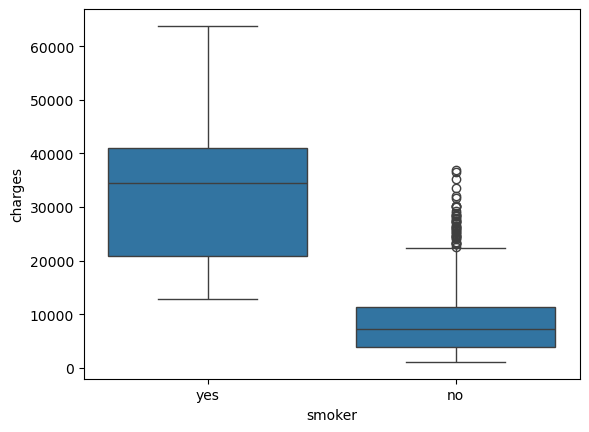

In [24]:
sns.boxplot(data = insurance_smoker_charges, x = 'smoker', y = 'charges')
plt.show()

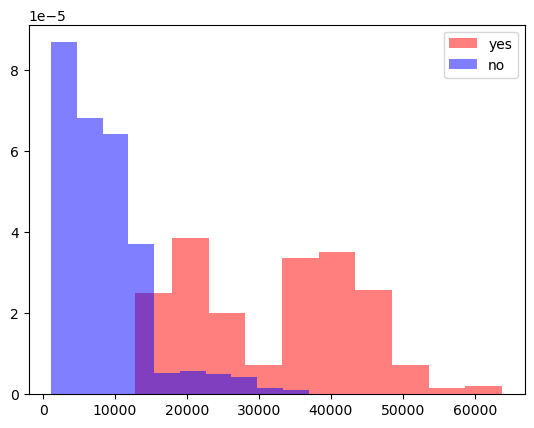

In [25]:
plt.hist(insurance_smoker , color="red", label="yes", density=True, alpha=0.5)
plt.hist(insurance_non_smoker , color="blue", label="no", density=True, alpha=0.5)
plt.legend()
plt.show()

> **Observation 1.** The difference is too large, therefore we can assume that being a smoker significantly increases your insurance cost.

> **Observation 2.** Our boxplot and histogram show that there is no overlap between these categories, therefore we can assume that being a smoker significantly increases your insurance cost.
>
---

##### 7. Is there any relationship between sex and charges?

In [26]:
insurance_sex_charges = med_insurance[['charges', 'sex']]
print(insurance_smoker_charges.head(5))

insurance_male = insurance_sex_charges.charges[insurance_sex_charges.sex == 'male']
insurance_female = insurance_sex_charges.charges[insurance_sex_charges.sex == 'female']

insurance_male_mean = insurance_male.mean()
insurance_female_mean = insurance_female.mean()

insurance_male_median = insurance_male.median()
insurance_female_median = insurance_female.median()

print("The difference between male mean and female mean:", insurance_male_mean - insurance_female_mean)
print("The difference between male median and female median:", insurance_male_median - insurance_female_median)

       charges smoker
0  16884.92400    yes
1   1725.55230     no
2   4449.46200     no
3  21984.47061     no
4   3866.85520     no
The difference between male mean and female mean: 1387.1723338865468
The difference between male median and female median: -43.34674999999879


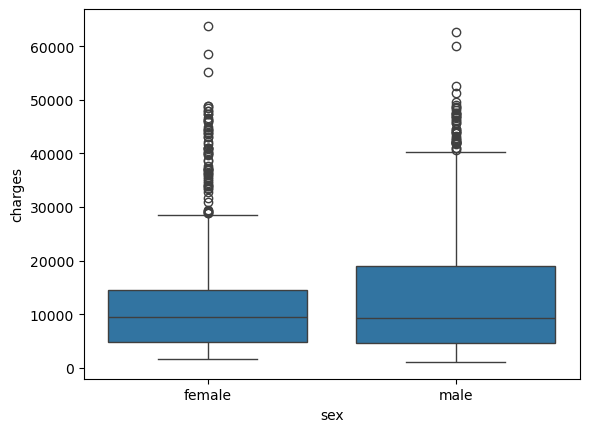

In [27]:
sns.boxplot(data = insurance_sex_charges, x = 'sex', y = 'charges')
plt.show()

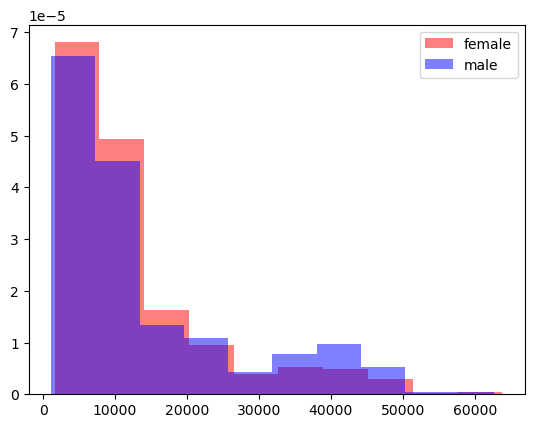

In [28]:
plt.hist(insurance_female , color="red", label="female", density=True, alpha=0.5)
plt.hist(insurance_male , color="blue", label="male", density=True, alpha=0.5)
plt.legend()
plt.show()

> **Observation 1.** Our difference and plots show us that there's not much difference in charges between female and male people.
>
---

##### Is there any relationships between regions and charges?

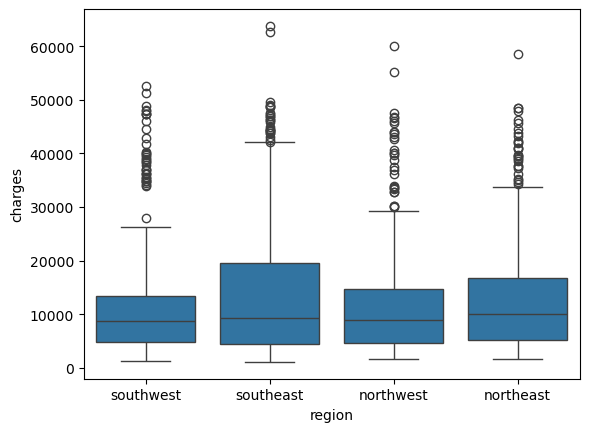

In [29]:
sns.boxplot(data = med_insurance, x = 'region', y = 'charges')
plt.show()

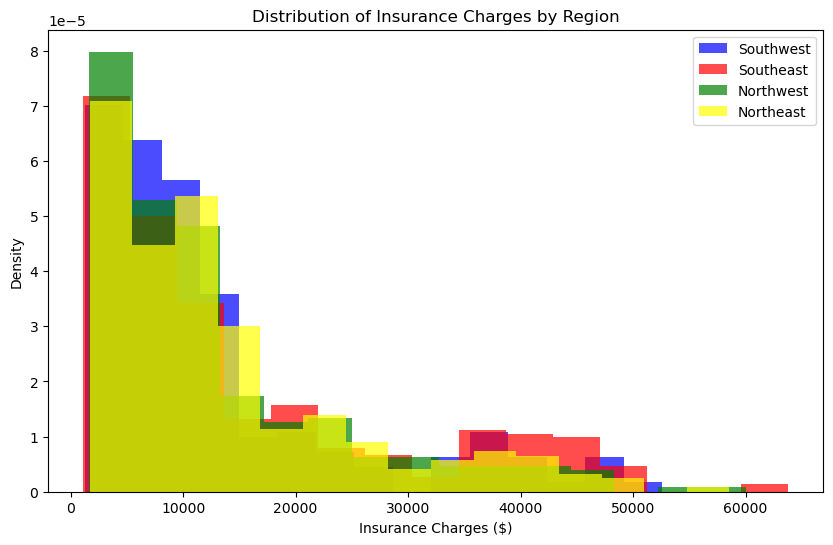

In [30]:
plt.figure(figsize=(10, 6))

sw_charges = med_insurance_2[med_insurance_2['region_southwest'] == 1]['charges']
se_charges = med_insurance_2[med_insurance_2['region_southeast'] == 1]['charges']
nw_charges = med_insurance_2[med_insurance_2['region_northwest'] == 1]['charges']
ne_charges = med_insurance_2[med_insurance_2['region_northeast'] == 1]['charges']

plt.hist(sw_charges, color="blue", label="Southwest", density=True, alpha=0.7, bins=15)
plt.hist(se_charges, color="red", label="Southeast", density=True, alpha=0.7, bins=15)
plt.hist(nw_charges, color="green", label="Northwest", density=True, alpha=0.7, bins=15)
plt.hist(ne_charges, color="yellow", label="Northeast", density=True, alpha=0.7, bins=15)

plt.xlabel('Insurance Charges ($)')
plt.ylabel('Density')
plt.title('Distribution of Insurance Charges by Region')
plt.legend()
plt.show()

> **Observation 1.** From this two plots we can see that regions are not strongly associated with charges